In [57]:
from scipy.io import loadmat
data = loadmat('mnist-original.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [58]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])

In [59]:
y = data['label'].ravel()
# y.shape
y

array([0., 0., 0., ..., 9., 9., 9.])

In [60]:
data['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [61]:
import pandas as pd
X = pd.DataFrame(data['data'].T)
X
# print(X.shape)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


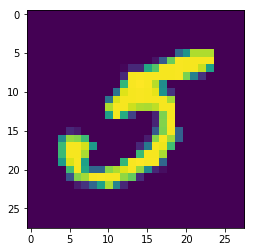

In [62]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
some_digit = np.array(X.iloc[36000,])
some_digit_img = some_digit.reshape(28,28)
plt.imshow(some_digit_img, interpolation='nearest')
# plt.axis('off')
plt.show()

In [63]:
y[36000]

5.0

In [64]:
X_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
type(y_train)

numpy.ndarray

In [68]:
import numpy as np
shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_idx], y_train[shuffle_idx]
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
57112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
sgd_clf.predict([some_digit])

array([ True])

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# 分层采样，分成3份
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # 采用上面的模型的clone版本
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9464
0.9472
0.9659


In [77]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9464, 0.9472, 0.9659])

In [78]:
from sklearn.base import BaseEstimator
class not5(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool) # 返回全部不是5
not5_clf = not5()
cross_val_score(not5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91015, 0.90745, 0.91135])

In [80]:
# 混淆矩阵
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


array([[52625,  1954],
       [  856,  4565]], dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52625,  1954],
       [  856,  4565]], dtype=int64)

In [90]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # 0.7002607761926676
recall_score(y_train_5, y_train_pred) # 0.8420955543257701

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) # 0.7646566164154103

0.7646566164154103

In [93]:
help(SGDClassifier.decision_function)

Help on function decision_function in module sklearn.linear_model._base:

decision_function(self, X)
    Predict confidence scores for samples.
    
    The confidence score for a sample is the signed distance of that
    sample to the hyperplane.
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)
        Confidence scores per (sample, class) combination. In the binary
        case, confidence score for self.classes_[1] where >0 means this
        class would be predicted.

